In [1]:
import os
import shutil
from zipfile import ZipFile 
import pandas as pd
import re

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')

from sklearn.feature_extraction.text import CountVectorizer
import PIL.Image
from IPython.display import display

import gensim.models.word2vec as w2v
from sklearn.decomposition import PCA
import plotly.graph_objects as go
from plotly.offline import iplot

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import plotly.offline as pyo
pyo.init_notebook_mode()

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
direccion = 'Cons_Todas.zip'

In [3]:
# Descomprimir el archivo ZIP
with ZipFile(direccion) as archivo: 
    archivo.extractall('Cons_Todas/')  

In [4]:
d = dict()
for ruta, carpetas, archivos in os.walk('./Cons_Todas/Cons_Todas/'):
    for archivo in archivos:
        with open(ruta + "/" + archivo, encoding="utf-8") as libro:
            texto = ""
            dfLibros = []
            datoLibros = libro.read()
            dfLibros.append(datoLibros)
            d[archivo] = datoLibros
            for element in dfLibros:
                dfElementos = []
                dfElementos.append(element.strip())
                texto = texto + element + " "
            print ("En la sentencia " + archivo + " Hay " + str(len(texto.split())) + " Palabras")

En la sentencia 1045a-10.txt Hay 16874 Palabras
En la sentencia 256-15.txt Hay 53128 Palabras
En la sentencia 273-16.txt Hay 12420 Palabras
En la sentencia 275-19.txt Hay 32209 Palabras
En la sentencia 298-16.txt Hay 46636 Palabras
En la sentencia 331-12.txt Hay 12468 Palabras
En la sentencia 342-19.txt Hay 18668 Palabras
En la sentencia 361-17.txt Hay 80772 Palabras
En la sentencia 366-11.txt Hay 36789 Palabras
En la sentencia 395-12.txt Hay 18149 Palabras
En la sentencia 438-15.txt Hay 25343 Palabras
En la sentencia 462A-14.txt Hay 54946 Palabras
En la sentencia 530-16.txt Hay 26875 Palabras
En la sentencia 547-10.txt Hay 23088 Palabras
En la sentencia 568-17.txt Hay 22836 Palabras
En la sentencia 622-16.txt Hay 75823 Palabras
En la sentencia 652-98.txt Hay 12772 Palabras
En la sentencia 737-17.txt Hay 14255 Palabras
En la sentencia 766-15.txt Hay 22010 Palabras
En la sentencia 955-03.txt Hay 17762 Palabras
En la sentencia A053-17.txt Hay 27680 Palabras
En la sentencia A281-19.txt Ha

In [5]:
dfTotalLibros = pd.DataFrame(list(d.items()), columns =['NombreSentencias','Texto']) 
dfTotalLibros

NombreSentencias                                              Texto
0      1045a-10.txt  II. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL...
1        256-15.txt  CONSIDERACIONES  Y FUNDAMENTOS DE LA CORTE  \n...
2        273-16.txt  II. CONSIDERACIONES1 \n \nA. Competencia \n \n...
3        275-19.txt  .CONSIDERACIONES DE LA CORTE CONSTITUCIONAL \n...
4        298-16.txt  2. CONSIDERACIONES \n \n3.1. COMPETENCIA \n \n...
5        331-12.txt  VI. FUNDAMENTOS DE LA DECISIÓN \n \n1. Compete...
6        342-19.txt  II. CONSIDERACIONES DE LA CORTE \n \n1. Compet...
7        361-17.txt  II.  \nCONSIDERACIONES Y FUNDAMENTOS \n \nComp...
8        366-11.txt  CONSIDERACIONES Y FUNDAMENTOS \n \nCompetencia...
9        395-12.txt  CONSIDERACIONES Y FUNDAMENTOS \n \n1. \nCompet...
10       438-15.txt  2. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL ...
11      462A-14.txt  1. \nCONSIDERACIONES DE LA CORTE CONSTITUCIONA...
12       530-16.txt  II. CONSIDERACIONES Y FUNDAMENTOS  \n \nProble...
13       547-10.txt  3. \nConsideraciones preliminares \n \nPara es...
14       568-17.txt  III. REVISIÓN POR LA CORTE CONSTITUCIONAL \n \...
15       622-16.txt  IV. CONSIDERACIONES Y FUNDAMENTOS. \n \n1. \nC...
16       652-98.txt  CONSIDERACIONES DE LA CORTE \n \n1. Competenci...
17       737-17.txt  I. \nCONSIDERACIONES \n \nA. COMPETENCIA \n \n...
18       766-15.txt  IV. CONSIDERACIONES \n \n1. Competencia  \n \n...
19       955-03.txt  CONSIDERACIONES Y FUNDAMENTOS \n \n1. \nCompet...
20      A053-17.txt  Auto 053/17 \n \nSOLICITUD DE NULIDAD SENTENCI...
21      A281-19.txt  Auto 281/19 \n \nSOLICITUD DE NULIDAD SENTENCI...
22     C-035-16.txt  CONSIDERACIONES DE LA CORTE CONSTITUCIONAL \n ...
23     C-123-14.txt  VI. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...
24     C-389-16.txt  V CONSIDERACIONES \n \nCompetencia \n \nEsta C...
25     C-535-96.txt  VI.  FUNDAMENTOS JURÍDICOS \n \nCompetencia. \...
26     C-795-00.txt  VI.  CONSIDERACIONES Y FUNDAMENTOS \n \nCompet...
27     SU095-18.txt  II. CONSIDERACIONES Y FUNDAMENTOS DE LA DECISI...
28     Su411-20.txt  CONSIDERACIONES Y FUNDAMENTOS \n \nCompetencia...
29     SU698-17.txt  I. \nCONSIDERACIONES \n \n1. Competencia \n \n...
30    SU_133-17.txt  Sentencia SU133/17 \n \n \nExpediente  T-45613...
31     T-272-17.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...
32     T-445-16.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1.     ...
33     T-614-19.txt  II. CONSIDERACIONES  \n \n1. Competencia \n \n...
34     T-713-17.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...

### Preprocesamiento del texto

In [6]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords])
    return texto

In [7]:
dfTotalLibros['textoLimpio'] = dfTotalLibros['Texto'].apply(lambda texto: pre_procesado(texto))
dfTotalLibros
data=dfTotalLibros
data

NombreSentencias                                              Texto  \
0      1045a-10.txt  II. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL...   
1        256-15.txt  CONSIDERACIONES  Y FUNDAMENTOS DE LA CORTE  \n...   
2        273-16.txt  II. CONSIDERACIONES1 \n \nA. Competencia \n \n...   
3        275-19.txt  .CONSIDERACIONES DE LA CORTE CONSTITUCIONAL \n...   
4        298-16.txt  2. CONSIDERACIONES \n \n3.1. COMPETENCIA \n \n...   
5        331-12.txt  VI. FUNDAMENTOS DE LA DECISIÓN \n \n1. Compete...   
6        342-19.txt  II. CONSIDERACIONES DE LA CORTE \n \n1. Compet...   
7        361-17.txt  II.  \nCONSIDERACIONES Y FUNDAMENTOS \n \nComp...   
8        366-11.txt  CONSIDERACIONES Y FUNDAMENTOS \n \nCompetencia...   
9        395-12.txt  CONSIDERACIONES Y FUNDAMENTOS \n \n1. \nCompet...   
10       438-15.txt  2. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL ...   
11      462A-14.txt  1. \nCONSIDERACIONES DE LA CORTE CONSTITUCIONA...   
12       530-16.txt  II. CONSIDERACIONES Y FUNDAMENTOS  \n \nProble...   
13       547-10.txt  3. \nConsideraciones preliminares \n \nPara es...   
14       568-17.txt  III. REVISIÓN POR LA CORTE CONSTITUCIONAL \n \...   
15       622-16.txt  IV. CONSIDERACIONES Y FUNDAMENTOS. \n \n1. \nC...   
16       652-98.txt  CONSIDERACIONES DE LA CORTE \n \n1. Competenci...   
17       737-17.txt  I. \nCONSIDERACIONES \n \nA. COMPETENCIA \n \n...   
18       766-15.txt  IV. CONSIDERACIONES \n \n1. Competencia  \n \n...   
19       955-03.txt  CONSIDERACIONES Y FUNDAMENTOS \n \n1. \nCompet...   
20      A053-17.txt  Auto 053/17 \n \nSOLICITUD DE NULIDAD SENTENCI...   
21      A281-19.txt  Auto 281/19 \n \nSOLICITUD DE NULIDAD SENTENCI...   
22     C-035-16.txt  CONSIDERACIONES DE LA CORTE CONSTITUCIONAL \n ...   
23     C-123-14.txt  VI. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   
24     C-389-16.txt  V CONSIDERACIONES \n \nCompetencia \n \nEsta C...   
25     C-535-96.txt  VI.  FUNDAMENTOS JURÍDICOS \n \nCompetencia. \...   
26     C-795-00.txt  VI.  CONSIDERACIONES Y FUNDAMENTOS \n \nCompet...   
27     SU095-18.txt  II. CONSIDERACIONES Y FUNDAMENTOS DE LA DECISI...   
28     Su411-20.txt  CONSIDERACIONES Y FUNDAMENTOS \n \nCompetencia...   
29     SU698-17.txt  I. \nCONSIDERACIONES \n \n1. Competencia \n \n...   
30    SU_133-17.txt  Sentencia SU133/17 \n \n \nExpediente  T-45613...   
31     T-272-17.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   
32     T-445-16.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1.     ...   
33     T-614-19.txt  II. CONSIDERACIONES  \n \n1. Competencia \n \n...   
34     T-713-17.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   

                                          textoLimpio  
0   ii consideraciones corte constitucional primer...  
1   consideraciones fundamentos corte competencia ...  
2   ii consideraciones competencia tribunal compet...  
3   consideraciones corte constitucional competenc...  
4   consideraciones competencia conforme numeral º...  
5   vi fundamentos decisión competencia corte conf...  
6   ii consideraciones corte competencia sala comp...  
7   ii consideraciones fundamentos competencia cor...  
8   consideraciones fundamentos competencia confor...  
9   consideraciones fundamentos competencia virtud...  
10  consideraciones corte constitucional competenc...  
11  consideraciones corte constitucional competenc...  
12  ii consideraciones fundamentos problema jurídi...  
13  consideraciones preliminares establecer si cas...  
14  iii revisión corte constitucional competencia ...  
15  iv consideraciones fundamentos competencia cor...  
16  consideraciones corte competencia corte consti...  
17  i consideraciones competencia corte competente...  
18  iv consideraciones competencia competente sala...  
19  consideraciones fundamentos competencia corte ...  
20  auto solicitud nulidad sentencia corte constit...  
21  auto solicitud nulidad sentencia corte constit...  
22  consideraciones corte constitucional asunto pr

### Proceso de matriz transpuesta

In [8]:
import re
import pandas as pd
import numpy as np

In [9]:
data['conteo'] = data['textoLimpio'].apply(lambda fila:len(fila.split()))
data

NombreSentencias                                              Texto  \
0      1045a-10.txt  II. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL...   
1        256-15.txt  CONSIDERACIONES  Y FUNDAMENTOS DE LA CORTE  \n...   
2        273-16.txt  II. CONSIDERACIONES1 \n \nA. Competencia \n \n...   
3        275-19.txt  .CONSIDERACIONES DE LA CORTE CONSTITUCIONAL \n...   
4        298-16.txt  2. CONSIDERACIONES \n \n3.1. COMPETENCIA \n \n...   
5        331-12.txt  VI. FUNDAMENTOS DE LA DECISIÓN \n \n1. Compete...   
6        342-19.txt  II. CONSIDERACIONES DE LA CORTE \n \n1. Compet...   
7        361-17.txt  II.  \nCONSIDERACIONES Y FUNDAMENTOS \n \nComp...   
8        366-11.txt  CONSIDERACIONES Y FUNDAMENTOS \n \nCompetencia...   
9        395-12.txt  CONSIDERACIONES Y FUNDAMENTOS \n \n1. \nCompet...   
10       438-15.txt  2. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL ...   
11      462A-14.txt  1. \nCONSIDERACIONES DE LA CORTE CONSTITUCIONA...   
12       530-16.txt  II. CONSIDERACIONES Y FUNDAMENTOS  \n \nProble...   
13       547-10.txt  3. \nConsideraciones preliminares \n \nPara es...   
14       568-17.txt  III. REVISIÓN POR LA CORTE CONSTITUCIONAL \n \...   
15       622-16.txt  IV. CONSIDERACIONES Y FUNDAMENTOS. \n \n1. \nC...   
16       652-98.txt  CONSIDERACIONES DE LA CORTE \n \n1. Competenci...   
17       737-17.txt  I. \nCONSIDERACIONES \n \nA. COMPETENCIA \n \n...   
18       766-15.txt  IV. CONSIDERACIONES \n \n1. Competencia  \n \n...   
19       955-03.txt  CONSIDERACIONES Y FUNDAMENTOS \n \n1. \nCompet...   
20      A053-17.txt  Auto 053/17 \n \nSOLICITUD DE NULIDAD SENTENCI...   
21      A281-19.txt  Auto 281/19 \n \nSOLICITUD DE NULIDAD SENTENCI...   
22     C-035-16.txt  CONSIDERACIONES DE LA CORTE CONSTITUCIONAL \n ...   
23     C-123-14.txt  VI. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   
24     C-389-16.txt  V CONSIDERACIONES \n \nCompetencia \n \nEsta C...   
25     C-535-96.txt  VI.  FUNDAMENTOS JURÍDICOS \n \nCompetencia. \...   
26     C-795-00.txt  VI.  CONSIDERACIONES Y FUNDAMENTOS \n \nCompet...   
27     SU095-18.txt  II. CONSIDERACIONES Y FUNDAMENTOS DE LA DECISI...   
28     Su411-20.txt  CONSIDERACIONES Y FUNDAMENTOS \n \nCompetencia...   
29     SU698-17.txt  I. \nCONSIDERACIONES \n \n1. Competencia \n \n...   
30    SU_133-17.txt  Sentencia SU133/17 \n \n \nExpediente  T-45613...   
31     T-272-17.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   
32     T-445-16.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1.     ...   
33     T-614-19.txt  II. CONSIDERACIONES  \n \n1. Competencia \n \n...   
34     T-713-17.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   

                                          textoLimpio  conteo  
0   ii consideraciones corte constitucional primer...    8503  
1   consideraciones fundamentos corte competencia ...   27389  
2   ii consideraciones competencia tribunal compet...    6340  
3   consideraciones corte constitucional competenc...   16801  
4   consideraciones competencia conforme numeral º...   23342  
5   vi fundamentos decisión competencia corte conf...    6190  
6   ii consideraciones corte competencia sala comp...    9693  
7   ii consideraciones fundamentos competencia cor...   40987  
8   consideraciones fundamentos competencia confor...   18666  
9   consideraciones fundamentos competencia virtud...    8928  
10  consideraciones corte constitucional competenc...   12911  
11  consideraciones corte constitucional competenc...   27960  
12  ii consideraciones fundamentos problema jurídi...   13210  
13  consideraciones preliminares establecer si cas...   11363  
14  iii revisión corte constitucional competencia ...   11273  
15  iv consideraciones fundamentos competencia cor...   38212  
16  consideraciones corte competencia corte consti...    6553  
17  i consideraciones competencia corte competente...    7127  
18  iv consideraciones competencia competente sala...   11341  
19  consideraciones fundamentos competencia corte ...    8

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
count_vect = CountVectorizer()
bow_rep = count_vect.fit_transform(data['textoLimpio'].values)
data

NombreSentencias                                              Texto  \
0      1045a-10.txt  II. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL...   
1        256-15.txt  CONSIDERACIONES  Y FUNDAMENTOS DE LA CORTE  \n...   
2        273-16.txt  II. CONSIDERACIONES1 \n \nA. Competencia \n \n...   
3        275-19.txt  .CONSIDERACIONES DE LA CORTE CONSTITUCIONAL \n...   
4        298-16.txt  2. CONSIDERACIONES \n \n3.1. COMPETENCIA \n \n...   
5        331-12.txt  VI. FUNDAMENTOS DE LA DECISIÓN \n \n1. Compete...   
6        342-19.txt  II. CONSIDERACIONES DE LA CORTE \n \n1. Compet...   
7        361-17.txt  II.  \nCONSIDERACIONES Y FUNDAMENTOS \n \nComp...   
8        366-11.txt  CONSIDERACIONES Y FUNDAMENTOS \n \nCompetencia...   
9        395-12.txt  CONSIDERACIONES Y FUNDAMENTOS \n \n1. \nCompet...   
10       438-15.txt  2. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL ...   
11      462A-14.txt  1. \nCONSIDERACIONES DE LA CORTE CONSTITUCIONA...   
12       530-16.txt  II. CONSIDERACIONES Y FUNDAMENTOS  \n \nProble...   
13       547-10.txt  3. \nConsideraciones preliminares \n \nPara es...   
14       568-17.txt  III. REVISIÓN POR LA CORTE CONSTITUCIONAL \n \...   
15       622-16.txt  IV. CONSIDERACIONES Y FUNDAMENTOS. \n \n1. \nC...   
16       652-98.txt  CONSIDERACIONES DE LA CORTE \n \n1. Competenci...   
17       737-17.txt  I. \nCONSIDERACIONES \n \nA. COMPETENCIA \n \n...   
18       766-15.txt  IV. CONSIDERACIONES \n \n1. Competencia  \n \n...   
19       955-03.txt  CONSIDERACIONES Y FUNDAMENTOS \n \n1. \nCompet...   
20      A053-17.txt  Auto 053/17 \n \nSOLICITUD DE NULIDAD SENTENCI...   
21      A281-19.txt  Auto 281/19 \n \nSOLICITUD DE NULIDAD SENTENCI...   
22     C-035-16.txt  CONSIDERACIONES DE LA CORTE CONSTITUCIONAL \n ...   
23     C-123-14.txt  VI. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   
24     C-389-16.txt  V CONSIDERACIONES \n \nCompetencia \n \nEsta C...   
25     C-535-96.txt  VI.  FUNDAMENTOS JURÍDICOS \n \nCompetencia. \...   
26     C-795-00.txt  VI.  CONSIDERACIONES Y FUNDAMENTOS \n \nCompet...   
27     SU095-18.txt  II. CONSIDERACIONES Y FUNDAMENTOS DE LA DECISI...   
28     Su411-20.txt  CONSIDERACIONES Y FUNDAMENTOS \n \nCompetencia...   
29     SU698-17.txt  I. \nCONSIDERACIONES \n \n1. Competencia \n \n...   
30    SU_133-17.txt  Sentencia SU133/17 \n \n \nExpediente  T-45613...   
31     T-272-17.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   
32     T-445-16.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1.     ...   
33     T-614-19.txt  II. CONSIDERACIONES  \n \n1. Competencia \n \n...   
34     T-713-17.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   

                                          textoLimpio  conteo  
0   ii consideraciones corte constitucional primer...    8503  
1   consideraciones fundamentos corte competencia ...   27389  
2   ii consideraciones competencia tribunal compet...    6340  
3   consideraciones corte constitucional competenc...   16801  
4   consideraciones competencia conforme numeral º...   23342  
5   vi fundamentos decisión competencia corte conf...    6190  
6   ii consideraciones corte competencia sala comp...    9693  
7   ii consideraciones fundamentos competencia cor...   40987  
8   consideraciones fundamentos competencia confor...   18666  
9   consideraciones fundamentos competencia virtud...    8928  
10  consideraciones corte constitucional competenc...   12911  
11  consideraciones corte constitucional competenc...   27960  
12  ii consideraciones fundamentos problema jurídi...   13210  
13  consideraciones preliminares establecer si cas...   11363  
14  iii revisión corte constitucional competencia ...   11273  
15  iv consideraciones fundamentos competencia cor...   38212  
16  consideraciones corte competencia corte consti...    6553  
17  i consideraciones competencia corte competente...    7127  
18  iv consideraciones competencia competente sala...   11341  
19  consideraciones fundamentos competencia corte ...    8

In [12]:
tf = pd.DataFrame(bow_rep.toarray())
tf.columns = count_vect.get_feature_names()
tf.index = data['NombreSentencias'].index

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect=TfidfVectorizer()
tfidf=tfidf_vect.fit_transform(data['textoLimpio'].values)

In [14]:
tfidf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.00833133, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00383232, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.0053944 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00216308, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [15]:
tfidf_matrix=pd.DataFrame(tfidf.toarray(), columns=tfidf_vect.get_feature_names())
tfidf_matrix.index=data.NombreSentencias

In [16]:
tfidf_matrix

aarhus       aas      aati       ab     abajo  abandona  \
NombreSentencias                                                              
1045a-10.txt      0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
256-15.txt        0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
273-16.txt        0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
275-19.txt        0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
298-16.txt        0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
331-12.txt        0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
342-19.txt        0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
361-17.txt        0.005392  0.000000  0.000000  0.00000  0.004922  0.000000   
366-11.txt        0.000000  0.000000  0.000000  0.00000  0.008097  0.000000   
395-12.txt        0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
438-15.txt        0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
462A-14.txt       0.000000  0.002943  0.000000  0.00000  0.001805  0.000000   
530-16.txt        0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
547-10.txt        0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
568-17.txt        0.000000  0.000000  0.006552  0.00000  0.000000  0.000000   
622-16.txt        0.002030  0.000000  0.000000  0.00000  0.002780  0.000000   
652-98.txt        0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
737-17.txt        0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
766-15.txt        0.000000  0.000000  0.000000  0.00000  0.000000  0.006831   
955-03.txt        0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
A053-17.txt       0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
A281-19.txt       0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
C-035-16.txt      0.000000  0.000000  0.000000  0.00000  0.001646  0.000000   
C-123-14.txt      0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
C-389-16.txt      0.000000  0.000000  0.000000  0.00000  0.001924  0.000000   
C-535-96.txt      0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
C-795-00.txt      0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
SU095-18.txt      0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
Su411-20.txt      0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
SU698-17.txt      0.000000  0.000000  0.000000  0.00000  0.005954  0.000000   
SU_133-17.txt     0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
T-272-17.txt      0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
T-445-16.txt      0.000000  0.000000  0.000000  0.00419  0.000000  0.000000   
T-614-19.txt      0.000000  0.000000  0.000000  0.00000  0.005504  0.000000   
T-713-17.txt      0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   

                  abandonada  abandonadas  abandonado  abandonados  ...  \
NombreSentencias                                                    ...   
1045a-10.txt        0.000000     0.000000    0.000000     0.000000  ...   
256-15.txt          0.000000     0.000000    0.000000     0.000000  ...   
273-16.txt          0.000000     0.000000    0.000000     0.000000  ...   
275-19.txt          0.000000     0.000000    0.000000     0.000000  ...   
298-16.txt          0.000000     0.000000    0.000000     0.000000  ...   
331-12.txt          0.000000     0.000000    0.000000     0.000000  ...   
342-19.txt          0.000000     0.000000    0.000000     0.000000  ...   
361-17.txt          0.000000     0.000000    0.000000     0.000000  ...   
366-11.txt          0.000000     0.000000    0.000000     0.000000  ...   
395-12.txt          0.000000     0.000000    0.000000     0.000000  ...   
438-15.txt          0.000000     0.000000    0.000000     0.000000  ...   
462A-14.txt         0.002419     0.002250    0.000000     0.002943  ...   
530-16.txt          0.000000     0.000000    0

In [17]:
tfidf_matrix=tfidf_matrix.T.round(3)
tfidf_matrix

NombreSentencias  1045a-10.txt  256-15.txt  273-16.txt  275-19.txt  \
aarhus                   0.000       0.000       0.000       0.000   
aas                      0.000       0.000       0.000       0.000   
aati                     0.000       0.000       0.000       0.000   
ab                       0.000       0.000       0.000       0.000   
abajo                    0.000       0.000       0.000       0.000   
...                        ...         ...         ...         ...   
único                    0.002       0.001       0.003       0.005   
únicos                   0.000       0.000       0.000       0.003   
útil                     0.008       0.004       0.000       0.006   
útiles                   0.000       0.000       0.000       0.005   
μg                       0.000       0.000       0.000       0.004   

NombreSentencias  298-16.txt  331-12.txt  342-19.txt  361-17.txt  366-11.txt  \
aarhus                 0.000       0.000       0.000       0.005       0.000   
aas                    0.000       0.000       0.000       0.000       0.000   
aati                   0.000       0.000       0.000       0.000       0.000   
ab                     0.000       0.000       0.000       0.000       0.000   
abajo                  0.000       0.000       0.000       0.005       0.008   
...                      ...         ...         ...         ...         ...   
único                  0.005       0.003       0.009       0.003       0.002   
únicos                 0.000       0.000       0.000       0.001       0.003   
útil                   0.002       0.005       0.000       0.000       0.000   
útiles                 0.002       0.000       0.000       0.000       0.003   
μg                     0.000       0.000       0.000       0.000       0.000   

NombreSentencias  395-12.txt  ...  C-535-96.txt  C-795-00.txt  SU095-18.txt  \
aarhus                 0.000  ...           0.0           0.0         0.000   
aas                    0.000  ...           0.0           0.0         0.000   
aati                   0.000  ...           0.0           0.0         0.000   
ab                     0.000  ...           0.0           0.0         0.000   
abajo                  0.000  ...           0.0           0.0         0.000   
...                      ...  ...           ...           ...           ...   
único                  0.002  ...           0.0           0.0         0.007   
únicos                 0.011  ...           0.0           0.0         0.000   
útil                   0.000  ...           0.0           0.0         0.000   
útiles                 0.000  ...           0.0           0.0         0.008   
μg                     0.000  ...           0.0           0.0         0.000   

NombreSentencias  Su411-20.txt  SU698-17.txt  SU_133-17.txt  T-272-17.txt  \
aarhus                    0.00         0.000          0.000         0.000   
aas                       0.00         0.000          0.000         0.000   
aati                      0.00         0.000          0.000         0.000   
ab                        0.00         0.000          0.000         0.000   
abajo                     0.00         0.006          0.000         0.000   
...                        ...           ...            ...           ...   
único                     0.01         0.003          0.009         0.003   
únicos                    0.00         0.000          0.000         0.000   
útil                      0.00         0.002          0.000         0.005   
útiles                    0.00         0.000          0.000         0.000   
μg                        0.00         0.000          0.000         0.000   

NombreSentencias  T-445-16.txt  T-614-19.txt  T-713-17.txt  
aarhus                   0.000         0.000         0.000  
aas                      0.000         0.000         0.000  
aati                     0.000         0.000         0.000  
ab                       0.004         0.000         0.000  
abajo              

### Cálculo de la distancia del coseno

In [18]:
from sklearn.metrics.pairwise import cosine_distances
dist_cos=cosine_distances(tfidf_matrix.T.values)
dist_cos

array([[0.        , 0.5528227 , 0.68922154, ..., 0.5288346 , 0.68366071,
        0.60044014],
       [0.5528227 , 0.        , 0.75968632, ..., 0.54916149, 0.53398899,
        0.70422422],
       [0.68922154, 0.75968632, 0.        , ..., 0.48630554, 0.78364097,
        0.79021717],
       ...,
       [0.5288346 , 0.54916149, 0.48630554, ..., 0.        , 0.57558213,
        0.67607991],
       [0.68366071, 0.53398899, 0.78364097, ..., 0.57558213, 0.        ,
        0.77248295],
       [0.60044014, 0.70422422, 0.79021717, ..., 0.67607991, 0.77248295,
        0.        ]])

In [19]:
dist_cos=cosine_distances(tfidf_matrix.T.values)
dist_cos= pd.DataFrame(dist_cos, columns = tfidf_matrix.columns, index = tfidf_matrix.columns)
dist_cos

NombreSentencias  1045a-10.txt  256-15.txt  273-16.txt  275-19.txt  \
NombreSentencias                                                     
1045a-10.txt          0.000000    0.552823    0.689222    0.671551   
256-15.txt            0.552823    0.000000    0.759686    0.739795   
273-16.txt            0.689222    0.759686    0.000000    0.721985   
275-19.txt            0.671551    0.739795    0.721985    0.000000   
298-16.txt            0.613252    0.677132    0.496037    0.629543   
331-12.txt            0.442069    0.618385    0.514824    0.631688   
342-19.txt            0.609681    0.661312    0.390962    0.664104   
361-17.txt            0.607854    0.567782    0.701910    0.723115   
366-11.txt            0.283805    0.573155    0.546427    0.635152   
395-12.txt            0.390083    0.602219    0.427486    0.639565   
438-15.txt            0.231098    0.506149    0.657914    0.649076   
462A-14.txt           0.404443    0.524020    0.717646    0.668004   
530-16.txt            0.393720    0.558685    0.649870    0.715483   
547-10.txt            0.253653    0.537629    0.629868    0.653439   
568-17.txt            0.384458    0.585012    0.663368    0.696374   
622-16.txt            0.532388    0.510081    0.679935    0.536285   
652-98.txt            0.509267    0.666470    0.748584    0.760373   
737-17.txt            0.595926    0.639062    0.744807    0.797410   
766-15.txt            0.252850    0.523547    0.659412    0.637607   
955-03.txt            0.477308    0.627376    0.700247    0.736053   
A053-17.txt           0.669866    0.686989    0.487462    0.708855   
A281-19.txt           0.764538    0.738123    0.669799    0.716039   
C-035-16.txt          0.630131    0.623601    0.491391    0.682797   
C-123-14.txt          0.631578    0.666181    0.435083    0.690062   
C-389-16.txt          0.418301    0.574715    0.578624    0.539839   
C-535-96.txt          0.749593    0.793769    0.624808    0.780306   
C-795-00.txt          0.794294    0.837479    0.298527    0.800196   
SU095-18.txt          0.556428    0.626430    0.405924    0.642519   
Su411-20.txt          0.633346    0.694092    0.449991    0.749770   
SU698-17.txt          0.796748    0.667730    0.862784    0.835225   
SU_133-17.txt         0.721759    0.750835    0.750568    0.727272   
T-272-17.txt          0.579716    0.671652    0.751219    0.717961   
T-445-16.txt          0.528835    0.549161    0.486306    0.606343   
T-614-19.txt          0.683661    0.533989    0.783641    0.717471   
T-713-17.txt          0.600440    0.704224    0.790217    0.778987   

NombreSentencias  298-16.txt  331-12.txt  342-19.txt  361-17.txt  366-11.txt  \
NombreSentencias                                                               
1045a-10.txt        0.613252    0.442069    0.609681    0.607854    0.283805   
256-15.txt          0.677132    0.618385    0.661312    0.567782    0.573155   
273-16.txt          0.496037    0.514824    0.390962    0.701910    0.546427   
275-19.txt          0.629543    0.631688    0.664104    0.723115    0.635152   
298-16.txt          0.000000    0.466685    0.446475    0.591114    0.511904   
331-12.txt          0.466685    0.000000    0.491618    0.622149    0.301628   
342-19.txt          0.446475    0.491618    0.000000    0.580515    0.513154   
361-17.txt          0.591114    0.622149    0.580515    0.000000    0.589930   
366-11.txt          0.511904    0.301628    0.513154    0.589930    0.000000   
395-12.txt          0.446841    0.323079    0.391655    0.613471    0.249647   
438-15.txt          0.580338    0.396709    0.531829    0.543163    0.223483   
462A-14.txt         0.576719    0.498869    0.591160    0.543927    0.413839   
530-16.txt          0.633887    0.495397    0.564976    0.593565    0.367454   
547-10.txt          0.564737    0.357180    0.580639    0.580419    0.242970   
568-17.txt          0.612942    0.480674    0.579067    0.617663    0.383443   
622-16.txt          0.608005    0.506441    0.542

In [20]:
import seaborn as sn
import matplotlib.pyplot as plt

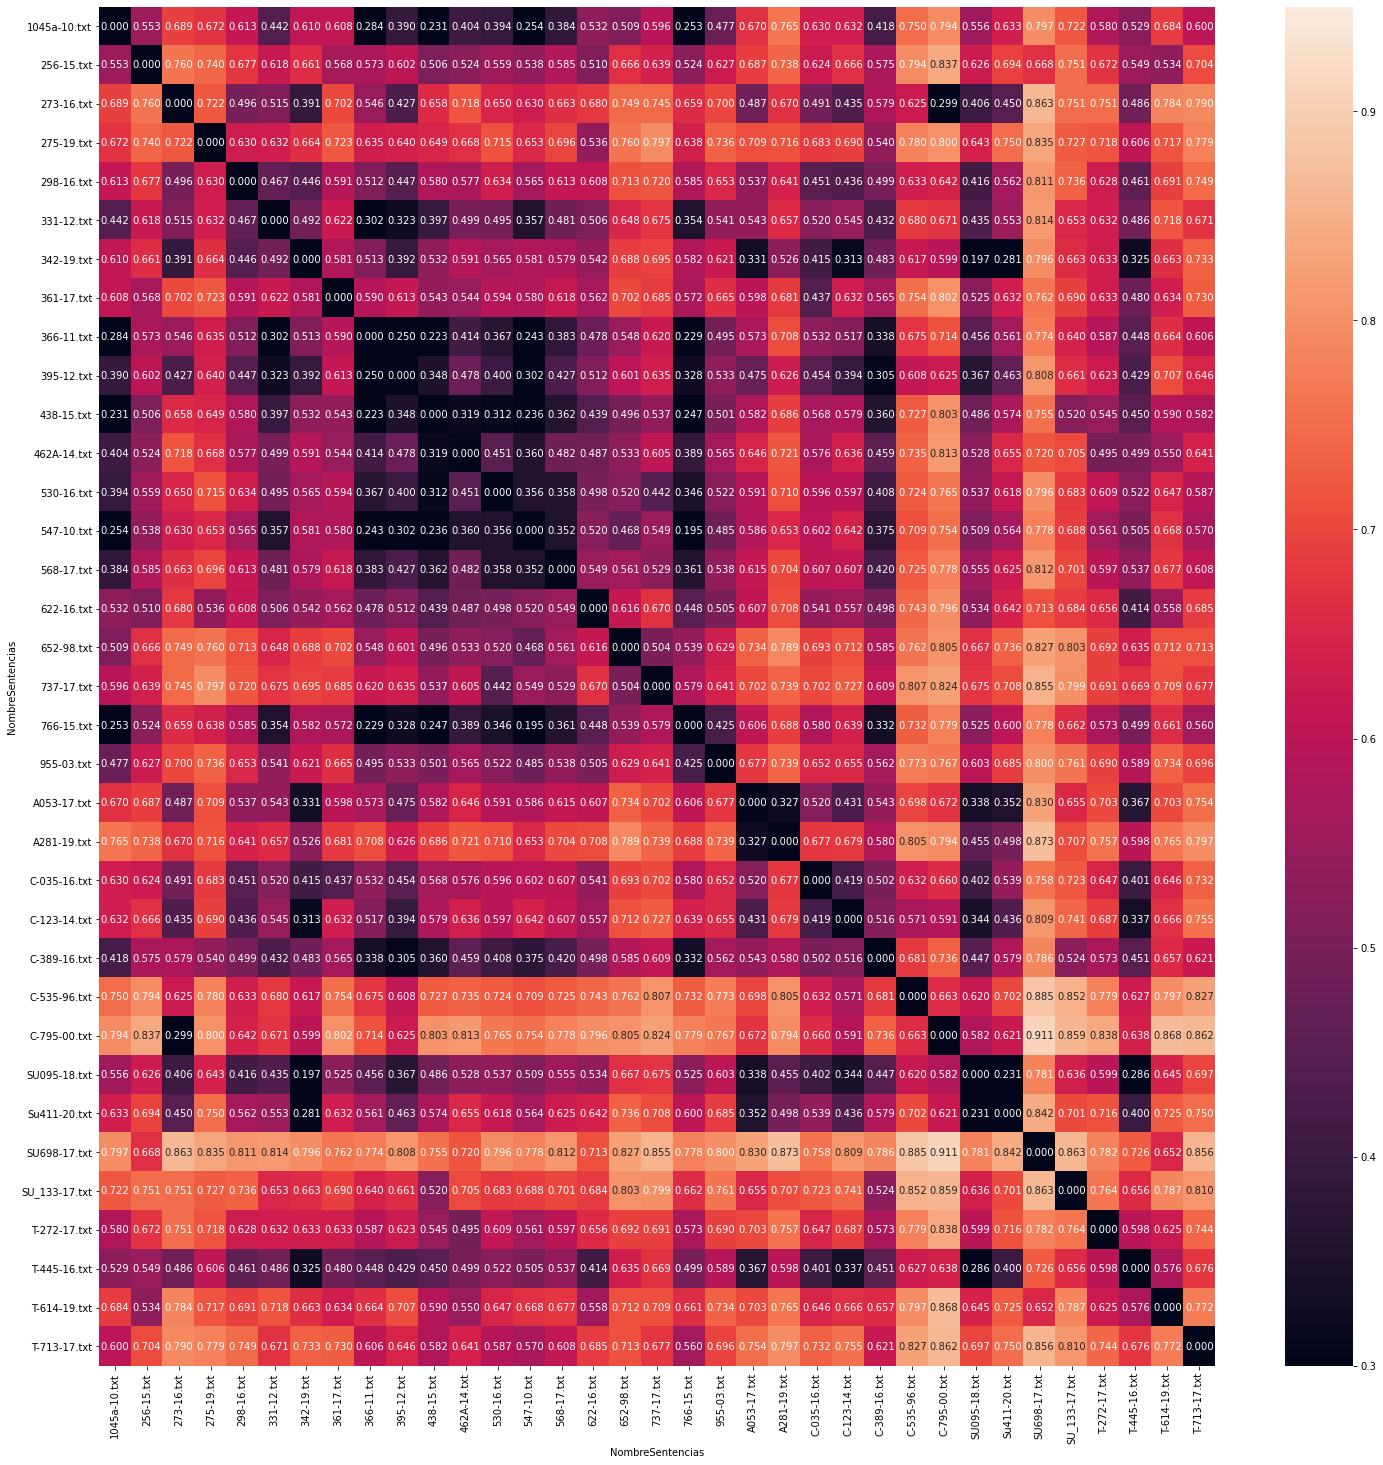

In [21]:
fig, ax = plt.subplots(figsize=(25,25))
sn.heatmap(dist_cos
           , annot=True
           , vmin=0.30
           , vmax=0.95 
           , fmt=".3f"
           , ax=ax
          )

### Visualización de kmeans

In [22]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords])
    return texto

In [23]:
dfTotalLibros['textoLimpio'] = dfTotalLibros['Texto'].apply(lambda texto: pre_procesado(texto))
dfTotalLibros
data=dfTotalLibros
data

NombreSentencias                                              Texto  \
0      1045a-10.txt  II. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL...   
1        256-15.txt  CONSIDERACIONES  Y FUNDAMENTOS DE LA CORTE  \n...   
2        273-16.txt  II. CONSIDERACIONES1 \n \nA. Competencia \n \n...   
3        275-19.txt  .CONSIDERACIONES DE LA CORTE CONSTITUCIONAL \n...   
4        298-16.txt  2. CONSIDERACIONES \n \n3.1. COMPETENCIA \n \n...   
5        331-12.txt  VI. FUNDAMENTOS DE LA DECISIÓN \n \n1. Compete...   
6        342-19.txt  II. CONSIDERACIONES DE LA CORTE \n \n1. Compet...   
7        361-17.txt  II.  \nCONSIDERACIONES Y FUNDAMENTOS \n \nComp...   
8        366-11.txt  CONSIDERACIONES Y FUNDAMENTOS \n \nCompetencia...   
9        395-12.txt  CONSIDERACIONES Y FUNDAMENTOS \n \n1. \nCompet...   
10       438-15.txt  2. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL ...   
11      462A-14.txt  1. \nCONSIDERACIONES DE LA CORTE CONSTITUCIONA...   
12       530-16.txt  II. CONSIDERACIONES Y FUNDAMENTOS  \n \nProble...   
13       547-10.txt  3. \nConsideraciones preliminares \n \nPara es...   
14       568-17.txt  III. REVISIÓN POR LA CORTE CONSTITUCIONAL \n \...   
15       622-16.txt  IV. CONSIDERACIONES Y FUNDAMENTOS. \n \n1. \nC...   
16       652-98.txt  CONSIDERACIONES DE LA CORTE \n \n1. Competenci...   
17       737-17.txt  I. \nCONSIDERACIONES \n \nA. COMPETENCIA \n \n...   
18       766-15.txt  IV. CONSIDERACIONES \n \n1. Competencia  \n \n...   
19       955-03.txt  CONSIDERACIONES Y FUNDAMENTOS \n \n1. \nCompet...   
20      A053-17.txt  Auto 053/17 \n \nSOLICITUD DE NULIDAD SENTENCI...   
21      A281-19.txt  Auto 281/19 \n \nSOLICITUD DE NULIDAD SENTENCI...   
22     C-035-16.txt  CONSIDERACIONES DE LA CORTE CONSTITUCIONAL \n ...   
23     C-123-14.txt  VI. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   
24     C-389-16.txt  V CONSIDERACIONES \n \nCompetencia \n \nEsta C...   
25     C-535-96.txt  VI.  FUNDAMENTOS JURÍDICOS \n \nCompetencia. \...   
26     C-795-00.txt  VI.  CONSIDERACIONES Y FUNDAMENTOS \n \nCompet...   
27     SU095-18.txt  II. CONSIDERACIONES Y FUNDAMENTOS DE LA DECISI...   
28     Su411-20.txt  CONSIDERACIONES Y FUNDAMENTOS \n \nCompetencia...   
29     SU698-17.txt  I. \nCONSIDERACIONES \n \n1. Competencia \n \n...   
30    SU_133-17.txt  Sentencia SU133/17 \n \n \nExpediente  T-45613...   
31     T-272-17.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   
32     T-445-16.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1.     ...   
33     T-614-19.txt  II. CONSIDERACIONES  \n \n1. Competencia \n \n...   
34     T-713-17.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   

                                          textoLimpio  conteo  
0   ii consideraciones corte constitucional primer...    8503  
1   consideraciones fundamentos corte competencia ...   27389  
2   ii consideraciones competencia tribunal compet...    6340  
3   consideraciones corte constitucional competenc...   16801  
4   consideraciones competencia conforme numeral º...   23342  
5   vi fundamentos decisión competencia corte conf...    6190  
6   ii consideraciones corte competencia sala comp...    9693  
7   ii consideraciones fundamentos competencia cor...   40987  
8   consideraciones fundamentos competencia confor...   18666  
9   consideraciones fundamentos competencia virtud...    8928  
10  consideraciones corte constitucional competenc...   12911  
11  consideraciones corte constitucional competenc...   27960  
12  ii consideraciones fundamentos problema jurídi...   13210  
13  consideraciones preliminares establecer si cas...   11363  
14  iii revisión corte constitucional competencia ...   11273  
15  iv consideraciones fundamentos competencia cor...   38212  
16  consideraciones corte competencia corte consti...    6553  
17  i consideraciones competencia corte competente...    7127  
18  iv consideraciones competencia competente sala...   11341  
19  consideraciones fundamentos competencia corte ...    8

In [24]:
tfidf_vect_2 = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect_2.fit_transform(data.textoLimpio.values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns=tfidf_vect_2.get_feature_names())
tfidf_matrix

aarhus       aas      aati       ab     abajo  abandona  abandonada  \
0   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
1   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
2   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
3   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
4   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
5   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
6   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
7   0.005392  0.000000  0.000000  0.00000  0.004922  0.000000    0.000000   
8   0.000000  0.000000  0.000000  0.00000  0.008097  0.000000    0.000000   
9   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
10  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
11  0.000000  0.002943  0.000000  0.00000  0.001805  0.000000    0.002419   
12  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
13  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
14  0.000000  0.000000  0.006552  0.00000  0.000000  0.000000    0.000000   
15  0.002030  0.000000  0.000000  0.00000  0.002780  0.000000    0.001862   
16  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
17  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
18  0.000000  0.000000  0.000000  0.00000  0.000000  0.006831    0.000000   
19  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
20  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
21  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
22  0.000000  0.000000  0.000000  0.00000  0.001646  0.000000    0.000000   
23  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
24  0.000000  0.000000  0.000000  0.00000  0.001924  0.000000    0.000000   
25  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
26  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
27  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
28  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
29  0.000000  0.000000  0.000000  0.00000  0.005954  0.000000    0.002659   
30  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
31  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   
32  0.000000  0.000000  0.000000  0.00419  0.000000  0.000000    0.000000   
33  0.000000  0.000000  0.000000  0.00000  0.005504  0.000000    0.000000   
34  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000    0.000000   

    abandonadas  abandonado  abandonados  ...    último   últimos     única  \
0      0.000000    0.000000     0.000000  ...  0.002348  0.000000  0.000000   
1      0.000000    0.000000     0.000000  ...  0.002160  0.001081  0.003611   
2      0.000000    0.000000     0.000000  ...  0.002911  0.000000  0.000000   
3      0.000000    0.000000     0.000000  ...  0.008046  0.006905  0.005764   
4      0.000000    0.000000     0.000000  ...  0.007053  0.002648  0.007737   
5      0.000000    0.000000     0.000000  ...  0.002795  0.000000  0.000000   
6      0.000000    0.000000     0.000000  ...  0.013607  0.003406  0.011373   
7      0.000000    0.000000     0.000000  ...  0.004907  0.000000  0.002051   
8      0.000000    0.000000     0.000000  ...  0.008370  0.001796  0.001499   
9      0.000000    0.000000     0.000000  ...  0.000000  0.000000  0.000000   
10     0.000000    0.000000     0.000000  ...  0.003378  0.000000  0.006354   
11     0.002250    0.000000     0.002943  ...  0.005599  0.000000  0.002006   
12     0.000000    0.000000     0.000000  ...  0.007414  0.006681  0.000000   
13     0.000000    0.000000     0.000000  ...  0.000000  0.002629  0.000000   
14     0.000000    0.000000     0.000000  ...  0

### Método del codo para calibrar el modelo

In [25]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Vamos a hacer un entrenamiento de KMeans ¿Cómo se vería el modelo?

In [26]:
k=2
kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)

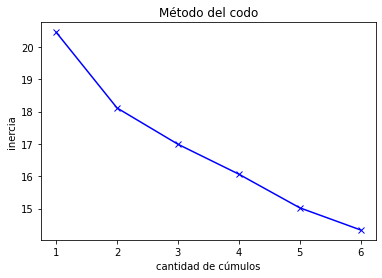

In [27]:
ks = []
k_inertia = []
for k in range (1,7):
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
    ks.append(k)
    k_inertia.append(kmeans.inertia_)

plt.xlabel('cantidad de cúmulos')
plt.ylabel('inercia')
plt.title('Método del codo')
plt.plot(ks,k_inertia, 'bx-')

Con el método del codo pudimos corroborar que nuestro kluster es de 2, lo que confirma la hipótesis de las tendencias "si" o "no". Decisiones que se calisifican en un sistema binario.

In [28]:
k=2
model= KMeans(n_clusters=k)
model.fit(tfidf_matrix)

data['cluster']=model.labels_
data.head(10)

NombreSentencias                                              Texto  \
0     1045a-10.txt  II. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL...   
1       256-15.txt  CONSIDERACIONES  Y FUNDAMENTOS DE LA CORTE  \n...   
2       273-16.txt  II. CONSIDERACIONES1 \n \nA. Competencia \n \n...   
3       275-19.txt  .CONSIDERACIONES DE LA CORTE CONSTITUCIONAL \n...   
4       298-16.txt  2. CONSIDERACIONES \n \n3.1. COMPETENCIA \n \n...   
5       331-12.txt  VI. FUNDAMENTOS DE LA DECISIÓN \n \n1. Compete...   
6       342-19.txt  II. CONSIDERACIONES DE LA CORTE \n \n1. Compet...   
7       361-17.txt  II.  \nCONSIDERACIONES Y FUNDAMENTOS \n \nComp...   
8       366-11.txt  CONSIDERACIONES Y FUNDAMENTOS \n \nCompetencia...   
9       395-12.txt  CONSIDERACIONES Y FUNDAMENTOS \n \n1. \nCompet...   

                                         textoLimpio  conteo  cluster  
0  ii consideraciones corte constitucional primer...    8503        1  
1  consideraciones fundamentos corte competencia ...   27389        1  
2  ii consideraciones competencia tribunal compet...    6340        0  
3  consideraciones corte constitucional competenc...   16801        1  
4  consideraciones competencia conforme numeral º...   23342        0  
5  vi fundamentos decisión competencia corte conf...    6190        1  
6  ii consideraciones corte competencia sala comp...    9693        0  
7  ii consideraciones fundamentos competencia cor...   40987        1  
8  consideraciones fundamentos competencia confor...   18666        1  
9  consideraciones fundamentos competencia virtud...    8928        1

En el anterior paso se corrobora a qué cluster pertenece cada decisión

### Términos más importantes para cada uno de nuestros Clusters

Centroides del modelo

In [29]:
k=2
model= KMeans(n_clusters=k)
model.fit(tfidf_matrix)
nbrs= NearestNeighbors(n_neighbors=2, metric="euclidean").fit(tfidf_matrix.values)

Vocabulario (universo) de los vectores

In [30]:
tfidf_vect.vocabulary_

{'ii': 11335,
 'consideraciones': 4897,
 'corte': 5574,
 'constitucional': 4991,
 'primera': 17339,
 'competencia': 4202,
 'corresponde': 5532,
 'analizar': 1375,
 'sala': 19853,
 'revisión': 19587,
 'fallo': 9831,
 'proferido': 17510,
 'dentro': 6503,
 'acción': 203,
 'tutela': 22021,
 'referencia': 18646,
 'fundamento': 10352,
 'artículos': 2032,
 'constitución': 5003,
 'decreto': 6200,
 'segunda': 20076,
 'debate': 6068,
 'afirmaron': 789,
 'actores': 388,
 'otorgó': 15779,
 'señor': 20268,
 'héctor': 11214,
 'jesús': 13027,
 'sarria': 19979,
 'concesión': 4466,
 'explotación': 9567,
 'territorios': 21469,
 'corresponden': 5533,
 'mediara': 14100,
 'consulta': 5062,
 'previa': 17296,
 'alguna': 1088,
 'cuanto': 5770,
 'informó': 12132,
 'consultó': 5088,
 'comunidad': 4364,
 'directamente': 7414,
 'afectada': 741,
 'tercera': 21425,
 'protección': 17788,
 'debe': 6078,
 'identidad': 11262,
 'integridad': 12484,
 'étnica': 23135,
 'cultural': 5865,
 'social': 20522,
 'económica': 794

In [31]:
len(tfidf_vect.vocabulary_)

23187

### Centroides y términos más cercanos

La siguiente línea me entrega ordenados los centroides

In [32]:
order_centroids=model.cluster_centers_.argsort()[:, ::-1]
order_centroids

array([[ 4365, 12016,  6560, ...,  3869, 19702,  5871],
       [13382,  2031, 20161, ..., 19974, 13965, 14225]], dtype=int64)

In [33]:
data['cluster']=model.labels_

centroides= model.cluster_centers_
order_centroids=model.cluster_centers_.argsort()[:, ::-1]
terms= tfidf_vect.get_feature_names()

print(f"CLUSTERS:\n")
for i in range (k):
    print(f"Cluster #{i}")
    print(f"TERMINOS: ", end=" ")
    for idx in order_centroids[i, :100]:#este es el número de palabras que quiero que me muestre por cluster
          print(f"{terms[idx]}", end=" ")
    print("\n\n")

CLUSTERS:

Cluster #0
TERMINOS:  comunidades indígenas derecho derechos consulta pueblos artículo corte sentencia ley comunidad constitucional previa participación recursos desarrollo protección ambiental proceso territorio explotación debe caso medidas así parte convenio constitución ser indígena ambiente territorios cultural nacional naturales manera tutela proyecto sala acción minera minería si resguardo social fundamentales medio étnicas puede dentro general agua ministerio relación autoridades actividades ii principio tierras respecto mp ambientales especial medida pueblo salud política fundamental jurisprudencia negras decisiones tribales propiedad embera grupos forma afrodescendientes mercurio actividad étnica acuerdo vida cerrejón condiciones mineros mismo decisión iii empresa identidad arroyo marmato sino oit autoridad art ello zonas zona proyectos 


Cluster #1
TERMINOS:  ley artículo sentencia constitucional corte territorial constitución territoriales competencias entidades

### Documentos que integran los clusters

In [34]:
nbrs= NearestNeighbors(n_neighbors=2, metric="euclidean").fit(tfidf_matrix.values)

In [35]:
data['cluster'] = model.labels_

#por buena práctica hacemos la siguiente linea
clust_cnt=data ['cluster'].value_counts()
clust_cnt_pct=data['cluster'].value_counts(normalize=True)

centroides = model.cluster_centers_
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vect.get_feature_names()

print(f"CLUSTERS:\n")
for i in range (k):
    print(f"Cluster #{i} ")
    print (f"{clust_cnt[i]} textos ({clust_cnt[i]:.2%} de los datos)")
    print(f"TERMINOS: "  , end=" ")
    for idx in order_centroids[i, :200]:
        print (f"{terms[idx]}", end= " ")
    print ("\n\n")
    print (f"Términos representativos")
    for texto in data.iloc[nbrs.kneighbors([centroides [i]])[1][0]]['Texto'].values:
        print(f"*{texto}")
    print ("\n\n")
  

CLUSTERS:

Cluster #0 
23 textos (2300.00% de los datos)
TERMINOS:  comunidades indígenas derecho derechos consulta pueblos artículo corte sentencia ley comunidad constitucional previa participación recursos desarrollo protección ambiental proceso territorio explotación debe caso medidas así parte convenio constitución ser indígena ambiente territorios cultural nacional naturales manera tutela proyecto sala acción minera minería si resguardo social fundamentales medio étnicas puede dentro general agua ministerio relación autoridades actividades ii principio tierras respecto mp ambientales especial medida pueblo salud política fundamental jurisprudencia negras decisiones tribales propiedad embera grupos forma afrodescendientes mercurio actividad étnica acuerdo vida cerrejón condiciones mineros mismo decisión iii empresa identidad arroyo marmato sino oit autoridad art ello zonas zona proyectos debido ver diversidad normas fin artículos efectos río cuenta afectación minas corporación pers

### Visualización utilizando PCA

In [36]:
data['texto_peq']=data['textoLimpio'].apply(lambda texto: texto[:100])
data

NombreSentencias                                              Texto  \
0      1045a-10.txt  II. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL...   
1        256-15.txt  CONSIDERACIONES  Y FUNDAMENTOS DE LA CORTE  \n...   
2        273-16.txt  II. CONSIDERACIONES1 \n \nA. Competencia \n \n...   
3        275-19.txt  .CONSIDERACIONES DE LA CORTE CONSTITUCIONAL \n...   
4        298-16.txt  2. CONSIDERACIONES \n \n3.1. COMPETENCIA \n \n...   
5        331-12.txt  VI. FUNDAMENTOS DE LA DECISIÓN \n \n1. Compete...   
6        342-19.txt  II. CONSIDERACIONES DE LA CORTE \n \n1. Compet...   
7        361-17.txt  II.  \nCONSIDERACIONES Y FUNDAMENTOS \n \nComp...   
8        366-11.txt  CONSIDERACIONES Y FUNDAMENTOS \n \nCompetencia...   
9        395-12.txt  CONSIDERACIONES Y FUNDAMENTOS \n \n1. \nCompet...   
10       438-15.txt  2. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL ...   
11      462A-14.txt  1. \nCONSIDERACIONES DE LA CORTE CONSTITUCIONA...   
12       530-16.txt  II. CONSIDERACIONES Y FUNDAMENTOS  \n \nProble...   
13       547-10.txt  3. \nConsideraciones preliminares \n \nPara es...   
14       568-17.txt  III. REVISIÓN POR LA CORTE CONSTITUCIONAL \n \...   
15       622-16.txt  IV. CONSIDERACIONES Y FUNDAMENTOS. \n \n1. \nC...   
16       652-98.txt  CONSIDERACIONES DE LA CORTE \n \n1. Competenci...   
17       737-17.txt  I. \nCONSIDERACIONES \n \nA. COMPETENCIA \n \n...   
18       766-15.txt  IV. CONSIDERACIONES \n \n1. Competencia  \n \n...   
19       955-03.txt  CONSIDERACIONES Y FUNDAMENTOS \n \n1. \nCompet...   
20      A053-17.txt  Auto 053/17 \n \nSOLICITUD DE NULIDAD SENTENCI...   
21      A281-19.txt  Auto 281/19 \n \nSOLICITUD DE NULIDAD SENTENCI...   
22     C-035-16.txt  CONSIDERACIONES DE LA CORTE CONSTITUCIONAL \n ...   
23     C-123-14.txt  VI. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   
24     C-389-16.txt  V CONSIDERACIONES \n \nCompetencia \n \nEsta C...   
25     C-535-96.txt  VI.  FUNDAMENTOS JURÍDICOS \n \nCompetencia. \...   
26     C-795-00.txt  VI.  CONSIDERACIONES Y FUNDAMENTOS \n \nCompet...   
27     SU095-18.txt  II. CONSIDERACIONES Y FUNDAMENTOS DE LA DECISI...   
28     Su411-20.txt  CONSIDERACIONES Y FUNDAMENTOS \n \nCompetencia...   
29     SU698-17.txt  I. \nCONSIDERACIONES \n \n1. Competencia \n \n...   
30    SU_133-17.txt  Sentencia SU133/17 \n \n \nExpediente  T-45613...   
31     T-272-17.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   
32     T-445-16.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1.     ...   
33     T-614-19.txt  II. CONSIDERACIONES  \n \n1. Competencia \n \n...   
34     T-713-17.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   

                                          textoLimpio  conteo  cluster  \
0   ii consideraciones corte constitucional primer...    8503        0   
1   consideraciones fundamentos corte competencia ...   27389        0   
2   ii consideraciones competencia tribunal compet...    6340        1   
3   consideraciones corte constitucional competenc...   16801        0   
4   consideraciones competencia conforme numeral º...   23342        1   
5   vi fundamentos decisión competencia corte conf...    6190        0   
6   ii consideraciones corte competencia sala comp...    9693        1   
7   ii consideraciones fundamentos competencia cor...   40987        0   
8   consideraciones fundamentos competencia confor...   18666        0   
9   consideraciones fundamentos competencia virtud...    8928        0   
10  consideraciones corte constitucional competenc...   12911        0   
11  consideraciones corte constitucional competenc...   27960        0   
12  ii consideraciones fundamentos problema jurídi...   13210        0   
13  consideraciones preliminares establecer si cas...   11363        0   
14  iii revisión corte constitucional competencia ...   11273        0   
15  iv consideraciones fundamentos competencia cor...   38212        0   
16  consideraciones corte competencia corte consti...    6553        0   
17  i 

In [37]:
pca = PCA(n_components=2)

result = pca.fit_transform(tfidf_matrix)
result = pd.DataFrame(result)
result.columns = ['X', 'Y']
result['cluster'] = data.cluster.values
result['texto'] = data.texto_peq.values
result['nombre'] = data.NombreSentencias.values

result

X         Y  cluster  \
0  -0.405167 -0.207614        0   
1  -0.182519  0.337395        0   
2   0.466056 -0.190288        1   
3   0.028834  0.198547        0   
4   0.246653 -0.048109        1   
5  -0.054447 -0.269231        0   
6   0.421323 -0.114775        1   
7   0.022919  0.249456        0   
8  -0.250837 -0.309381        0   
9   0.001575 -0.359097        0   
10 -0.368923 -0.156333        0   
11 -0.294297  0.078607        0   
12 -0.301314 -0.116790        0   
13 -0.367055 -0.249991        0   
14 -0.284498 -0.142040        0   
15 -0.114056  0.170013        0   
16 -0.267248  0.074305        0   
17 -0.222054  0.128531        0   
18 -0.391584 -0.230790        0   
19 -0.198522 -0.024609        0   
20  0.397459 -0.057486        1   
21  0.300898  0.079254        1   
22  0.255156  0.059916        1   
23  0.393157 -0.076726        1   
24 -0.120762 -0.150235        0   
25  0.248390  0.059996        1   
26  0.438689 -0.061250        1   
27  0.370919 -0.133242        1   
28  0.407216 -0.138932        1   
29 -0.031847  0.636016        0   
30  0.015804  0.115875        0   
31 -0.120933  0.214094        0   
32  0.226785  0.011521        1   
33 -0.059435  0.530221        0   
34 -0.206333  0.093171        0   

                                                texto         nombre  
0   ii consideraciones corte constitucional primer...   1045a-10.txt  
1   consideraciones fundamentos corte competencia ...     256-15.txt  
2   ii consideraciones competencia tribunal compet...     273-16.txt  
3   consideraciones corte constitucional competenc...     275-19.txt  
4   consideraciones competencia conforme numeral º...     298-16.txt  
5   vi fundamentos decisión competencia corte conf...     331-12.txt  
6   ii consideraciones corte competencia sala comp...     342-19.txt  
7   ii consideraciones fundamentos competencia cor...     361-17.txt  
8   consideraciones fundamentos competencia confor...     366-11.txt  
9   consideraciones fundamentos competencia virtud...     395-12.txt  
10  consideraciones corte constitucional competenc...     438-15.txt  
11  consideraciones corte constitucional competenc...    462A-14.txt  
12  ii consideraciones fundamentos problema jurídi...     530-16.txt  
13  consideraciones preliminares establecer si cas...     547-10.txt  
14  iii revisión corte constitucional competencia ...     568-17.txt  
15  iv consideraciones fundamentos competencia cor...     622-16.txt  
16  consideraciones corte competencia corte consti...     652-98.txt  
17  i consideraciones competencia corte competente...     737-17.txt  
18  iv consideraciones competencia competente sala...     766-15.txt  
19  consideraciones fundamentos competencia corte ...     955-03.txt  
20  auto solicitud nulidad sentencia corte constit...    A053-17.txt  
21  auto solicitud nulidad sentencia corte constit...    A281-19.txt  
22  consideraciones corte constitucional asunto pr...   C-035-16.txt  
23  vi consideraciones fundamentos competencia cor...   C-123-14.txt  
24  v consideraciones competencia corte competente...   C-389-16.txt  
25  vi fundamentos jurídicos competencia corte con...   C-535-96.txt  
26  vi consideraciones fundamentos competencia tér...   C-795-00.txt  
27  ii consideraciones fundamentos decisión compet...   SU095-18.txt  
28  consideraciones fundamentos competencia sala p...   Su411-20.txt  
29  i consideraciones competencia tribunal compete...   SU698-17.txt  
30  sentencia expediente t partes orlando jesús ra...  SU_133-17.txt  
31  ii consideraciones fundamentos competencia sal...   T-272-17.txt  
32  ii consideraciones fundamentos competencia sal...   T-445-16.txt  
33  ii consideraciones competencia sala revisión c...   T-614-19.txt  
34  ii consideraciones fundamentos competencia sal...   T-713-17.txt

In [38]:
result['texto'] = data.textoLimpio.apply(lambda val: val[:300])

trace = go.Scatter(x=result['X'].values,
                   y=result['Y'].values,
                   text=result['texto'].values,
                   mode='markers',
                   marker=dict(color=result['cluster'].values)) 

layout = go.Layout(title="PCA")

fig = go.Figure(data=trace, layout=layout)
iplot(fig)


### Conteo de palabras frecuentes

In [39]:
data

NombreSentencias                                              Texto  \
0      1045a-10.txt  II. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL...   
1        256-15.txt  CONSIDERACIONES  Y FUNDAMENTOS DE LA CORTE  \n...   
2        273-16.txt  II. CONSIDERACIONES1 \n \nA. Competencia \n \n...   
3        275-19.txt  .CONSIDERACIONES DE LA CORTE CONSTITUCIONAL \n...   
4        298-16.txt  2. CONSIDERACIONES \n \n3.1. COMPETENCIA \n \n...   
5        331-12.txt  VI. FUNDAMENTOS DE LA DECISIÓN \n \n1. Compete...   
6        342-19.txt  II. CONSIDERACIONES DE LA CORTE \n \n1. Compet...   
7        361-17.txt  II.  \nCONSIDERACIONES Y FUNDAMENTOS \n \nComp...   
8        366-11.txt  CONSIDERACIONES Y FUNDAMENTOS \n \nCompetencia...   
9        395-12.txt  CONSIDERACIONES Y FUNDAMENTOS \n \n1. \nCompet...   
10       438-15.txt  2. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL ...   
11      462A-14.txt  1. \nCONSIDERACIONES DE LA CORTE CONSTITUCIONA...   
12       530-16.txt  II. CONSIDERACIONES Y FUNDAMENTOS  \n \nProble...   
13       547-10.txt  3. \nConsideraciones preliminares \n \nPara es...   
14       568-17.txt  III. REVISIÓN POR LA CORTE CONSTITUCIONAL \n \...   
15       622-16.txt  IV. CONSIDERACIONES Y FUNDAMENTOS. \n \n1. \nC...   
16       652-98.txt  CONSIDERACIONES DE LA CORTE \n \n1. Competenci...   
17       737-17.txt  I. \nCONSIDERACIONES \n \nA. COMPETENCIA \n \n...   
18       766-15.txt  IV. CONSIDERACIONES \n \n1. Competencia  \n \n...   
19       955-03.txt  CONSIDERACIONES Y FUNDAMENTOS \n \n1. \nCompet...   
20      A053-17.txt  Auto 053/17 \n \nSOLICITUD DE NULIDAD SENTENCI...   
21      A281-19.txt  Auto 281/19 \n \nSOLICITUD DE NULIDAD SENTENCI...   
22     C-035-16.txt  CONSIDERACIONES DE LA CORTE CONSTITUCIONAL \n ...   
23     C-123-14.txt  VI. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   
24     C-389-16.txt  V CONSIDERACIONES \n \nCompetencia \n \nEsta C...   
25     C-535-96.txt  VI.  FUNDAMENTOS JURÍDICOS \n \nCompetencia. \...   
26     C-795-00.txt  VI.  CONSIDERACIONES Y FUNDAMENTOS \n \nCompet...   
27     SU095-18.txt  II. CONSIDERACIONES Y FUNDAMENTOS DE LA DECISI...   
28     Su411-20.txt  CONSIDERACIONES Y FUNDAMENTOS \n \nCompetencia...   
29     SU698-17.txt  I. \nCONSIDERACIONES \n \n1. Competencia \n \n...   
30    SU_133-17.txt  Sentencia SU133/17 \n \n \nExpediente  T-45613...   
31     T-272-17.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   
32     T-445-16.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1.     ...   
33     T-614-19.txt  II. CONSIDERACIONES  \n \n1. Competencia \n \n...   
34     T-713-17.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   

                                          textoLimpio  conteo  cluster  \
0   ii consideraciones corte constitucional primer...    8503        0   
1   consideraciones fundamentos corte competencia ...   27389        0   
2   ii consideraciones competencia tribunal compet...    6340        1   
3   consideraciones corte constitucional competenc...   16801        0   
4   consideraciones competencia conforme numeral º...   23342        1   
5   vi fundamentos decisión competencia corte conf...    6190        0   
6   ii consideraciones corte competencia sala comp...    9693        1   
7   ii consideraciones fundamentos competencia cor...   40987        0   
8   consideraciones fundamentos competencia confor...   18666        0   
9   consideraciones fundamentos competencia virtud...    8928        0   
10  consideraciones corte constitucional competenc...   12911        0   
11  consideraciones corte constitucional competenc...   27960        0   
12  ii consideraciones fundamentos problema jurídi...   13210        0   
13  consideraciones preliminares establecer si cas...   11363        0   
14  iii revisión corte constitucional competencia ...   11273        0   
15  iv consideraciones fundamentos competencia cor...   38212        0   
16  consideraciones corte competencia corte consti...    6553        0   
17  i 

In [40]:
#Convertimos la Serie en texto y le asignamos el valor de la cantidad de palabras 
idx = pd.Index(data['textoLimpio'])
data['NumPalabras'] = 0
for i in range(len(idx.str.split())):
    data.NumPalabras[i] = len(idx.str.split()[i])

C:\Users\villa\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
data[['NombreSentencias', 'NumPalabras']].sort_values(by='NumPalabras', ascending=False)

NombreSentencias  NumPalabras
7        361-17.txt        40987
15       622-16.txt        38212
22     C-035-16.txt        30879
27     SU095-18.txt        29556
11      462A-14.txt        27960
1        256-15.txt        27389
24     C-389-16.txt        27225
32     T-445-16.txt        23952
4        298-16.txt        23342
8        366-11.txt        18666
3        275-19.txt        16801
29     SU698-17.txt        15954
33     T-614-19.txt        15927
34     T-713-17.txt        14639
20      A053-17.txt        13602
21      A281-19.txt        13248
12       530-16.txt        13210
10       438-15.txt        12911
13       547-10.txt        11363
18       766-15.txt        11341
14       568-17.txt        11273
6        342-19.txt         9693
9        395-12.txt         8928
19       955-03.txt         8917
0      1045a-10.txt         8503
28     Su411-20.txt         8005
23     C-123-14.txt         7767
30    SU_133-17.txt         7344
17       737-17.txt         7127
31     T-272-17.txt         6976
16       652-98.txt         6553
2        273-16.txt         6340
5        331-12.txt         6190
25     C-535-96.txt         4861
26     C-795-00.txt         1846

In [42]:
#Concatenamos todas las palabras que están dentro del campo donde se indican los argumentos de la corte

texto = " ".join(razon for razon in data['textoLimpio'])

In [43]:
print ("Existen {} palabras en las consideraciones de la Corte Constitucional".format(len(texto)))

Existen 4790032 palabras en las consideraciones de la Corte Constitucional


In [44]:
import nltk
from nltk.corpus import stopwords
from nltk import collections

In [45]:
#Descargamso las palabras de conexión o StopWords para que no nos aparezca estas palabras dentro del conteo 
nltk.download('stopwords')
palabras_conexion = set(stopwords.words('spanish'))

#Eliminamos de nuestra lista, las palabras conexión
palabrasLimpias = [palabra for palabra in texto.lower().split() if not palabra in palabras_conexion]

#Transformamos a lista y contamos la cantidad de ocurrencias por palabra
palabras = collections.Counter(list(palabrasLimpias))

#Luego, lo pasamos a un DataFrame:
dfPalabras = pd.DataFrame(palabras.most_common(50),
                         columns=['palabra','cantidad'])

palabras.most_common(50)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\villa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('derecho', 3679),
 ('artículo', 3405),
 ('comunidades', 3345),
 ('corte', 3196),
 ('sentencia', 3106),
 ('derechos', 3091),
 ('constitucional', 2945),
 ('c', 2827),
 ('ley', 2696),
 ('indígenas', 2508),
 ('participación', 2225),
 ('consulta', 2207),
 ('desarrollo', 2178),
 ('recursos', 2113),
 ('t', 2025),
 ('ambiente', 1927),
 ('ambiental', 1844),
 ('protección', 1795),
 ('constitución', 1786),
 ('nacional', 1779),
 ('así', 1696),
 ('debe', 1666),
 ('parte', 1610),
 ('p', 1596),
 ('proceso', 1581),
 ('pueblos', 1574),
 ('caso', 1563),
 ('comunidad', 1535),
 ('ser', 1528),
 ('explotación', 1488),
 ('territorio', 1476),
 ('previa', 1385),
 ('naturales', 1366),
 ('principio', 1353),
 ('si', 1328),
 ('sala', 1318),
 ('m', 1309),
 ('manera', 1283),
 ('medio', 1249),
 ('minera', 1226),
 ('entidades', 1205),
 ('puede', 1187),
 ('tutela', 1185),
 ('actividades', 1176),
 ('autoridades', 1156),
 ('general', 1149),
 ('acción', 1138),
 ('agua', 1107),
 ('social', 1090),
 ('minería', 1088)]

In [46]:
dfPalabras.tail()

palabra  cantidad
45  general      1149
46   acción      1138
47     agua      1107
48   social      1090
49  minería      1088

### Pasar palabras a excel

In [47]:
dfPalabras.to_excel('ConstitucionalTodas.xls')

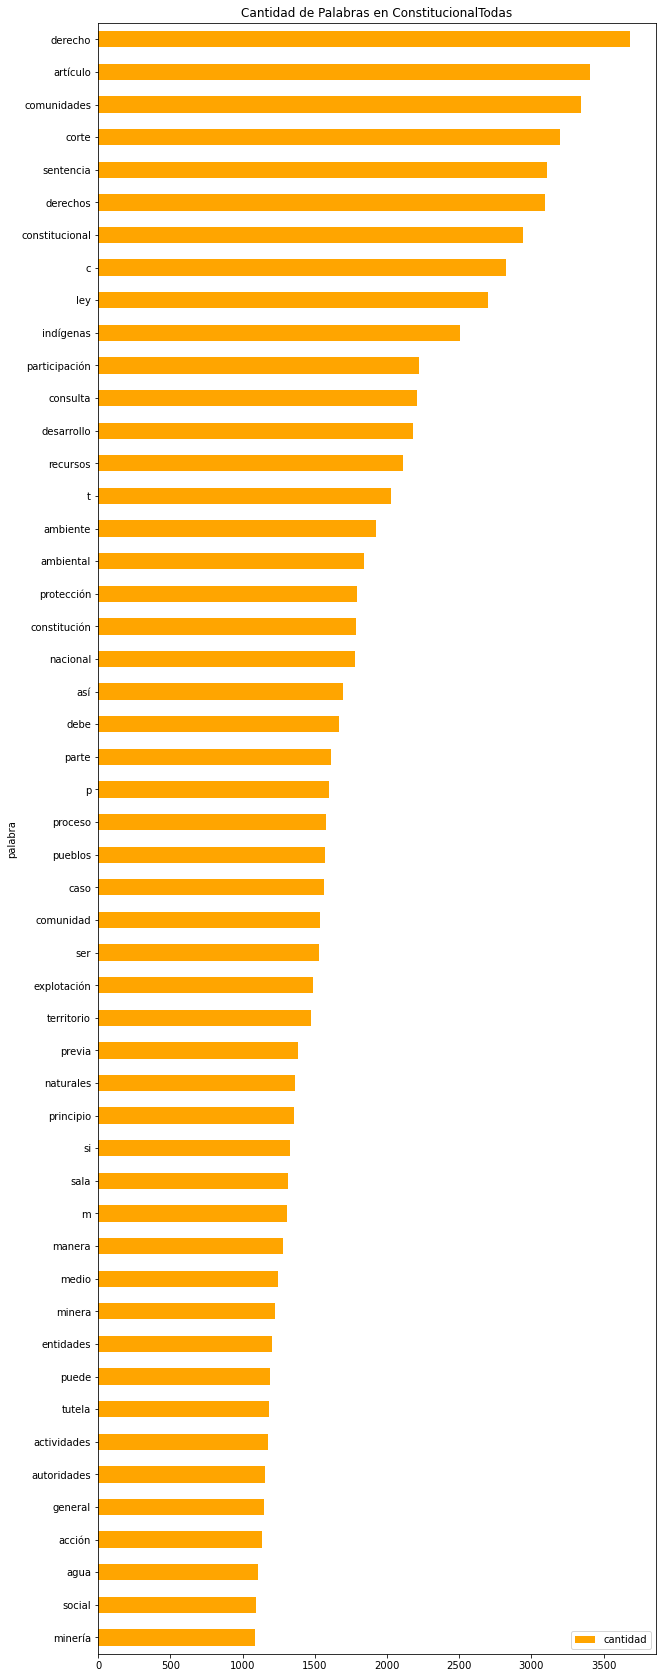

In [48]:
#Ahora, imprimamos en un Plot de Barras el resultado de las palabras más comunes
fig, ax = plt.subplots(figsize=(10, 30))

dfPalabras.sort_values(by='cantidad').plot.barh(x='palabra',
                      y='cantidad',
                      ax=ax,
                      color="orange")

ax.set_title("Cantidad de Palabras en ConstitucionalTodas")

plt.show()

### DHL para frases comunes

In [49]:
data

NombreSentencias                                              Texto  \
0      1045a-10.txt  II. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL...   
1        256-15.txt  CONSIDERACIONES  Y FUNDAMENTOS DE LA CORTE  \n...   
2        273-16.txt  II. CONSIDERACIONES1 \n \nA. Competencia \n \n...   
3        275-19.txt  .CONSIDERACIONES DE LA CORTE CONSTITUCIONAL \n...   
4        298-16.txt  2. CONSIDERACIONES \n \n3.1. COMPETENCIA \n \n...   
5        331-12.txt  VI. FUNDAMENTOS DE LA DECISIÓN \n \n1. Compete...   
6        342-19.txt  II. CONSIDERACIONES DE LA CORTE \n \n1. Compet...   
7        361-17.txt  II.  \nCONSIDERACIONES Y FUNDAMENTOS \n \nComp...   
8        366-11.txt  CONSIDERACIONES Y FUNDAMENTOS \n \nCompetencia...   
9        395-12.txt  CONSIDERACIONES Y FUNDAMENTOS \n \n1. \nCompet...   
10       438-15.txt  2. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL ...   
11      462A-14.txt  1. \nCONSIDERACIONES DE LA CORTE CONSTITUCIONA...   
12       530-16.txt  II. CONSIDERACIONES Y FUNDAMENTOS  \n \nProble...   
13       547-10.txt  3. \nConsideraciones preliminares \n \nPara es...   
14       568-17.txt  III. REVISIÓN POR LA CORTE CONSTITUCIONAL \n \...   
15       622-16.txt  IV. CONSIDERACIONES Y FUNDAMENTOS. \n \n1. \nC...   
16       652-98.txt  CONSIDERACIONES DE LA CORTE \n \n1. Competenci...   
17       737-17.txt  I. \nCONSIDERACIONES \n \nA. COMPETENCIA \n \n...   
18       766-15.txt  IV. CONSIDERACIONES \n \n1. Competencia  \n \n...   
19       955-03.txt  CONSIDERACIONES Y FUNDAMENTOS \n \n1. \nCompet...   
20      A053-17.txt  Auto 053/17 \n \nSOLICITUD DE NULIDAD SENTENCI...   
21      A281-19.txt  Auto 281/19 \n \nSOLICITUD DE NULIDAD SENTENCI...   
22     C-035-16.txt  CONSIDERACIONES DE LA CORTE CONSTITUCIONAL \n ...   
23     C-123-14.txt  VI. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   
24     C-389-16.txt  V CONSIDERACIONES \n \nCompetencia \n \nEsta C...   
25     C-535-96.txt  VI.  FUNDAMENTOS JURÍDICOS \n \nCompetencia. \...   
26     C-795-00.txt  VI.  CONSIDERACIONES Y FUNDAMENTOS \n \nCompet...   
27     SU095-18.txt  II. CONSIDERACIONES Y FUNDAMENTOS DE LA DECISI...   
28     Su411-20.txt  CONSIDERACIONES Y FUNDAMENTOS \n \nCompetencia...   
29     SU698-17.txt  I. \nCONSIDERACIONES \n \n1. Competencia \n \n...   
30    SU_133-17.txt  Sentencia SU133/17 \n \n \nExpediente  T-45613...   
31     T-272-17.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   
32     T-445-16.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1.     ...   
33     T-614-19.txt  II. CONSIDERACIONES  \n \n1. Competencia \n \n...   
34     T-713-17.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   

                                          textoLimpio  conteo  cluster  \
0   ii consideraciones corte constitucional primer...    8503        0   
1   consideraciones fundamentos corte competencia ...   27389        0   
2   ii consideraciones competencia tribunal compet...    6340        1   
3   consideraciones corte constitucional competenc...   16801        0   
4   consideraciones competencia conforme numeral º...   23342        1   
5   vi fundamentos decisión competencia corte conf...    6190        0   
6   ii consideraciones corte competencia sala comp...    9693        1   
7   ii consideraciones fundamentos competencia cor...   40987        0   
8   consideraciones fundamentos competencia confor...   18666        0   
9   consideraciones fundamentos competencia virtud...    8928        0   
10  consideraciones corte constitucional competenc...   12911        0   
11  consideraciones corte constitucional competenc...   27960        0   
12  ii consideraciones fundamentos problema jurídi...   13210        0   
13  consideraciones preliminares establecer si cas...   11363        0   
14  iii revisión corte constitucional competencia ...   11273        0   
15  iv consideraciones fundamentos competencia cor...   38212        0   
16  consideraciones corte competencia corte consti...    6553        0   
17  i 

In [50]:
from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')

In [51]:
def pre_procesado(texto):
    texto=str(texto)
    texto = texto.lower()
    #texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = re.sub(r"[\s]+", " ", texto) 
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    #texto = [spanishStemmer.stem(palabra) for palabra in texto.split() ]
    return texto

In [52]:
data['pre_procesado'] = data['Texto'].apply(lambda texto: pre_procesado(texto))
data

NombreSentencias                                              Texto  \
0      1045a-10.txt  II. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL...   
1        256-15.txt  CONSIDERACIONES  Y FUNDAMENTOS DE LA CORTE  \n...   
2        273-16.txt  II. CONSIDERACIONES1 \n \nA. Competencia \n \n...   
3        275-19.txt  .CONSIDERACIONES DE LA CORTE CONSTITUCIONAL \n...   
4        298-16.txt  2. CONSIDERACIONES \n \n3.1. COMPETENCIA \n \n...   
5        331-12.txt  VI. FUNDAMENTOS DE LA DECISIÓN \n \n1. Compete...   
6        342-19.txt  II. CONSIDERACIONES DE LA CORTE \n \n1. Compet...   
7        361-17.txt  II.  \nCONSIDERACIONES Y FUNDAMENTOS \n \nComp...   
8        366-11.txt  CONSIDERACIONES Y FUNDAMENTOS \n \nCompetencia...   
9        395-12.txt  CONSIDERACIONES Y FUNDAMENTOS \n \n1. \nCompet...   
10       438-15.txt  2. CONSIDERACIONES DE LA CORTE CONSTITUCIONAL ...   
11      462A-14.txt  1. \nCONSIDERACIONES DE LA CORTE CONSTITUCIONA...   
12       530-16.txt  II. CONSIDERACIONES Y FUNDAMENTOS  \n \nProble...   
13       547-10.txt  3. \nConsideraciones preliminares \n \nPara es...   
14       568-17.txt  III. REVISIÓN POR LA CORTE CONSTITUCIONAL \n \...   
15       622-16.txt  IV. CONSIDERACIONES Y FUNDAMENTOS. \n \n1. \nC...   
16       652-98.txt  CONSIDERACIONES DE LA CORTE \n \n1. Competenci...   
17       737-17.txt  I. \nCONSIDERACIONES \n \nA. COMPETENCIA \n \n...   
18       766-15.txt  IV. CONSIDERACIONES \n \n1. Competencia  \n \n...   
19       955-03.txt  CONSIDERACIONES Y FUNDAMENTOS \n \n1. \nCompet...   
20      A053-17.txt  Auto 053/17 \n \nSOLICITUD DE NULIDAD SENTENCI...   
21      A281-19.txt  Auto 281/19 \n \nSOLICITUD DE NULIDAD SENTENCI...   
22     C-035-16.txt  CONSIDERACIONES DE LA CORTE CONSTITUCIONAL \n ...   
23     C-123-14.txt  VI. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   
24     C-389-16.txt  V CONSIDERACIONES \n \nCompetencia \n \nEsta C...   
25     C-535-96.txt  VI.  FUNDAMENTOS JURÍDICOS \n \nCompetencia. \...   
26     C-795-00.txt  VI.  CONSIDERACIONES Y FUNDAMENTOS \n \nCompet...   
27     SU095-18.txt  II. CONSIDERACIONES Y FUNDAMENTOS DE LA DECISI...   
28     Su411-20.txt  CONSIDERACIONES Y FUNDAMENTOS \n \nCompetencia...   
29     SU698-17.txt  I. \nCONSIDERACIONES \n \n1. Competencia \n \n...   
30    SU_133-17.txt  Sentencia SU133/17 \n \n \nExpediente  T-45613...   
31     T-272-17.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   
32     T-445-16.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1.     ...   
33     T-614-19.txt  II. CONSIDERACIONES  \n \n1. Competencia \n \n...   
34     T-713-17.txt  II. CONSIDERACIONES Y FUNDAMENTOS \n \n1. Comp...   

                                          textoLimpio  conteo  cluster  \
0   ii consideraciones corte constitucional primer...    8503        0   
1   consideraciones fundamentos corte competencia ...   27389        0   
2   ii consideraciones competencia tribunal compet...    6340        1   
3   consideraciones corte constitucional competenc...   16801        0   
4   consideraciones competencia conforme numeral º...   23342        1   
5   vi fundamentos decisión competencia corte conf...    6190        0   
6   ii consideraciones corte competencia sala comp...    9693        1   
7   ii consideraciones fundamentos competencia cor...   40987        0   
8   consideraciones fundamentos competencia confor...   18666        0   
9   consideraciones fundamentos competencia virtud...    8928        0   
10  consideraciones corte constitucional competenc...   12911        0   
11  consideraciones corte constitucional competenc...   27960        0   
12  ii consideraciones fundamentos problema jurídi...   13210        0   
13  consideraciones preliminares establecer si cas...   11363        0   
14  iii revisión corte constitucional competencia ...   11273        0   
15  iv consideraciones fundamentos competencia cor...   38212        0   
16  consideraciones corte competencia corte consti...    6553        0   
17  i 

In [53]:
import pyLDAvis.gensim
from gensim.models import LdaModel
from gensim.corpora import Dictionary

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [54]:
dictionary = Dictionary(data['pre_procesado'].values)
dictionary

In [55]:
dictionary.filter_extremes(no_below=5, no_above=0.5)

corpus = [dictionary.doc2bow(text) for text in data['pre_procesado'].values]
corpus;

In [56]:
model2 = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=300)
model2

model2.print_topics(num_words=100)

[(0,
  '0.003*"(m.p." + 0.003*"oit," + 0.003*"embera" + 0.002*"||" + 0.002*"cerro" + 0.002*"afrodescendientes," + 0.002*"hidroeléctrica" + 0.002*"convenio," + 0.002*"2017," + 0.002*"mina" + 0.002*"afrodescendientes." + 0.002*"titulación" + 0.002*"represa" + 0.002*"puerto" + 0.002*"“…" + 0.001*"vereda" + 0.001*"embera-katío" + 0.001*"trabajos" + 0.001*"indígena." + 0.001*"operación" + 0.001*"resguardo," + 0.001*"forestal" + 0.001*"negras," + 0.001*"acta" + 0.001*"s.a." + 0.001*"silva." + 0.001*"c-030" + 0.001*"trámites" + 0.001*"párr." + 0.001*"palacio." + 0.001*"alcaldía" + 0.001*"cauca," + 0.001*"//" + 0.001*"su-039" + 0.001*"3," + 0.001*"previo," + 0.001*"paz," + 0.001*"compromisos" + 0.001*"ancestrales" + 0.001*"prelación" + 0.001*"chaljub." + 0.001*"relator" + 0.001*"administrativo," + 0.001*"saramaka" + 0.001*"étnicamente" + 0.001*"santa" + 0.001*"vivienda" + 0.001*"señor" + 0.001*"t-129" + 0.001*"étnicas." + 0.001*"formalización" + 0.001*"tradicional," + 0.001*"verificación" + 0.

In [57]:
lda_display = pyLDAvis.gensim.prepare(model2, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)
# pyLDAvis.save_html(lda_display, 'lda.html')